# Исследование о продаже компьютерных игр

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Цель**

Выявить закономерности, определяющие закономерность игры

**Описание данных**

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**План работы**

1) просмотреть данные;

2) привести названия столбцов к необходимому регистру

3) обработать пропуски;

4) провести исследовательский анализ данных;

5) провести статистический анализ данных

6) сделать общий вывод.



# 1 Предобработка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/datasets/games.csv')
print(data.head())

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
data = data.rename(
columns={
    'Name' : 'name',
    'Platform' : 'platform',
    'Year_of_Release' : 'year_of_release',
    'Genre' : 'genre',
    'NA_sales' : 'na_sales',
    'EU_sales' : 'eu_sales',
    'JP_sales' : 'jp_sales',
    'Other_sales' : 'other_sales',
    'Critic_Score' : 'critic_score',
    'User_Score' : 'user_score',
    'Rating' : 'rating'
}
)

In [4]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [5]:
data['name'] = data['name'].str.lower()

data.duplicated().sum()

0

In [6]:
data = data.dropna(subset=['name', 'genre'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


In [8]:
data.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
year_of_release,1.000000,-0.092326,0.004045,-0.168477,0.037821,0.011411,-0.267851
na_sales,-0.092326,1.000000,0.765341,0.449668,0.638695,0.240755,0.086200
eu_sales,0.004045,0.765341,1.000000,0.435079,0.722796,0.220752,0.055337
jp_sales,-0.168477,0.449668,0.435079,1.000000,0.291090,0.152593,0.125598
other_sales,0.037821,0.638695,0.722796,0.291090,1.000000,0.198554,0.057119
critic_score,0.011411,0.240755,0.220752,0.152593,0.198554,1.000000,0.580878
user_score,-0.267851,0.086200,0.055337,0.125598,0.057119,0.580878,1.000000


In [9]:
data['sum_sales'] = data['eu_sales'] + data['na_sales'] + data['jp_sales'] + data['other_sales']

In [10]:
data['rating'] = data['rating'].fillna(0)

**Вывод**

Была проведена первичная предобработка данных. По ее проведении были сделаны следующие выводы: 

1) в данных отсутствуют дубликаты;

2) был изменен тип данных в столбце 'user_score' на вещественный. Значение "tbd" было заменено на Nan, в силу того, что согласно интернет-ресурсам данная аббревиатура обозначет "to be done", т.е. должно быть сделано, то есть отметка еще не поставлена, значит она отсутствует;

3) были изменены названия столбцов на нижний регистр;

4) при этом пропуски были удалены в столбцах названия и жанра, в силу того, что пропущены всего 4 строки;

5) при этом пропуски в столбцах год выпуска, оценка критиков, пользовательская оценка и рейтинг были оставлены, так как заполнение их другими значениями может привести к искажению данных;

6) причины пропусков в столбце год и рейтинг могут быть вызваны ошибкой в копировании данных и некоторые данные были пропущены; пропуски в стобцах с рейтингом и оценкой могут быть вызваны тем, что оценки и рейтинг на данную игру отсутствуют;

7) также были посчитаны суммарные продажи в регионах.

# 2 Исследовательский анализ данных

<AxesSubplot:>

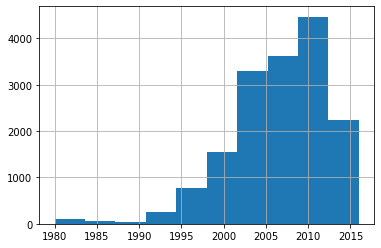

In [11]:
data['year_of_release'].hist()

**Вывод**

В силу того, что до 1995 года продажи игр практически отсустствуют, эти данные можно не брать для анализа, также следует отметить, что со временем качество компьютерных игры улучшается, поэтому до 1995 года, возможно, люди в них и не играли. Также следует отметить, что индустрия компьютерных игр- динамичная отрасль, в которой меняется все очень быстро, поэтому далее будут рассматриваться данные после 2014 года.

<AxesSubplot:>

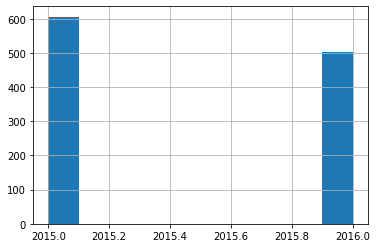

In [12]:
data.query('year_of_release > 2014')['year_of_release'].hist()


**Вывод**

В силу того, что анализировать данные за все года не имеет смысла (популярность игр со временем меняется), данные до 2014 года были отброшены для анализа. Из графика можно сделать вывод, что на данный момент спрос на компьютерные игры падает.

In [13]:
data_for_popular = data.query('year_of_release > 2014').copy()

platform
PS4     188.15
XOne     86.29
3DS      42.92
WiiU     20.95
PS3      20.42
Name: sum_sales, dtype: float64

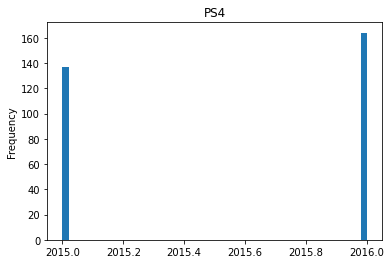

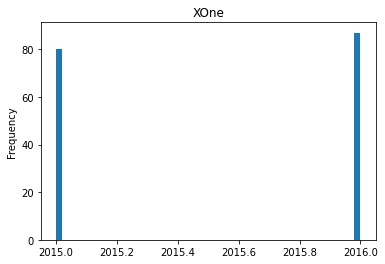

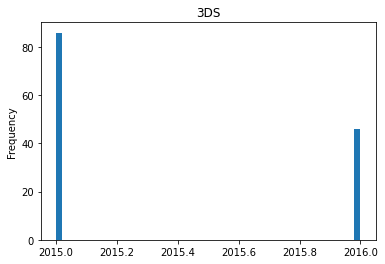

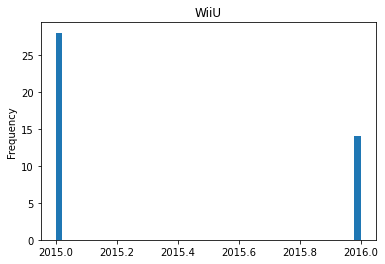

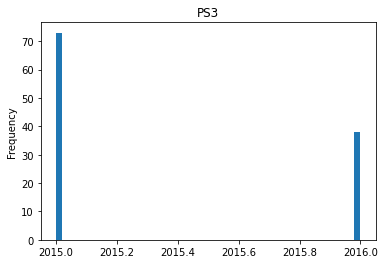

In [14]:
most_popular = data_for_popular.groupby('platform')['sum_sales'].sum().sort_values(ascending=False).head()
display(most_popular)
popular = ['PS4', 'XOne', '3DS', 'WiiU', 'PS3']

for unique in popular:
    data_for_popular.loc[data_for_popular['platform'] == unique, 'year_of_release'].plot(y='sum_sales', title=unique, kind='hist', bins=50)
    plt.show()

In [15]:
time_of_platform = data.query('year_of_release > 2000').query('platform == @popular').pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max'])
time_of_platform['diff'] = time_of_platform['max'] - time_of_platform['min']
time_of_platform

,min,max,diff
,year_of_release,year_of_release,
platform,,,
3DS,2011.0,2016.0,5.0
PS3,2006.0,2016.0,10.0
PS4,2013.0,2016.0,3.0
WiiU,2012.0,2016.0,4.0
XOne,2013.0,2016.0,3.0


**Вывод**

В среднем платформа, на которой играют в игры "живет около 5 лет", существует выброс у платформы DS, так как согласно графику первая игра на ней была сыграна еще в 1985 году, однако потом около 20 лет на ней не вышла почти ни одна игра, поэтому эти данные можно отбросить и анализировать платформы без них. 

In [16]:
data = data.query('year_of_release > 2014')

**Вывод**

В связи с доводами, приведенными выше, для анализа были оставлены данные об играх, которые были выпущены после 2014 года.

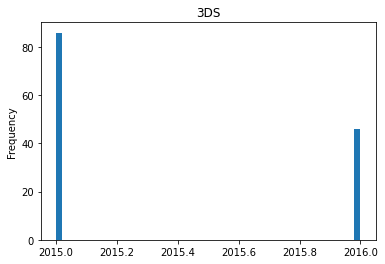

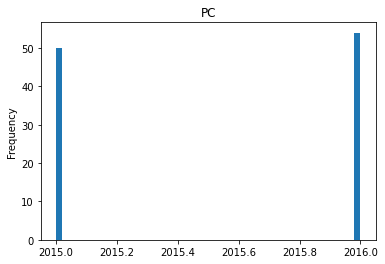

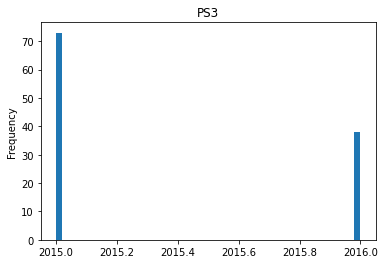

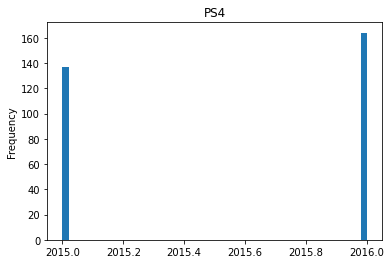

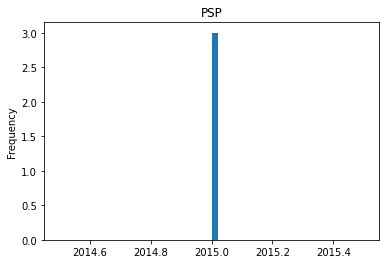

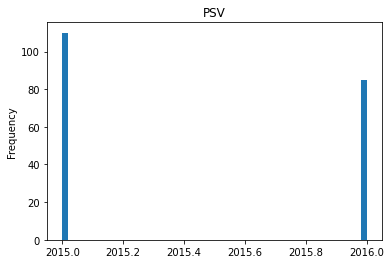

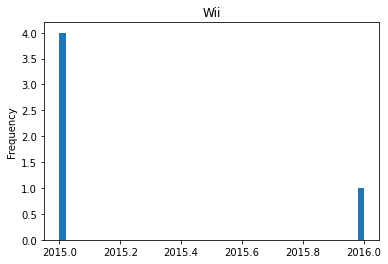

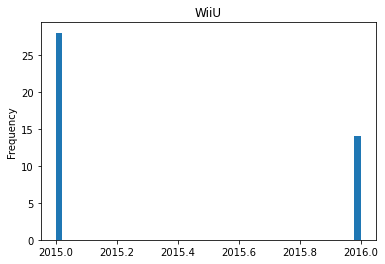

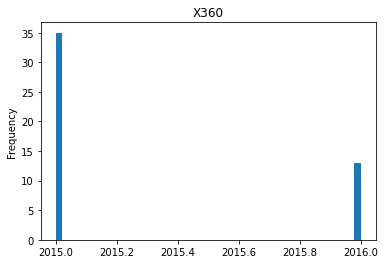

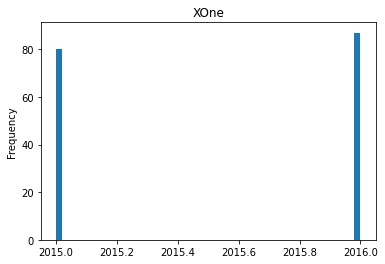

In [17]:
for unique, group in data.groupby('platform'):
    data.loc[data['platform'] == unique, 'year_of_release'].plot(y='sum_sales', title=unique, kind='hist', bins=50)
    plt.show()

In [18]:
data.pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending=False).head()

,sum_sales
platform,
PS4,188.15
XOne,86.29
3DS,42.92
WiiU,20.95
PS3,20.42


**Вывод**

На данный момент платформы с увелчивающимся количеством продаж: PC, PS4, XOne.

На данный момент платформы с падающими продажами: 3DS, PS3, PSP, PSV, Wii, WiiU, X360.

На данный момент платформы с наибольшим количеством продаж: PS4, XOne, 3DS, WiiU, PS3.

С учетом обозначенных выше позиций можно сделать вывод о том, что есть компании с большим растущим количеством продаж: PS4 и XOne при этом среди компаний с большим, но падающим количеством продаж следует отметить слудющие: PS3, Wii, WiiU, 3DS.

In [19]:
import seaborn as sns

<AxesSubplot:xlabel='sum_sales', ylabel='platform'>

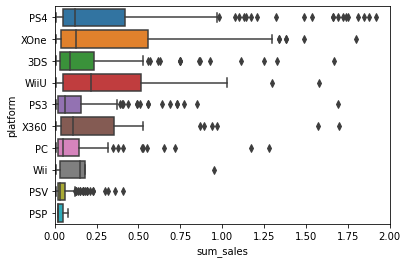

In [20]:
alive_platform = ['3DS', 'PS3', 'PSP', 'Wii', 'WiiU', 'X360', 'PC', 'PS4', 'PSV', 'XOne', 'PSV']
platforms = data.copy()
platforms = platforms.query('platform == @alive_platform')

plt.xlim(0, 2)  
sns.boxplot(y="platform", x="sum_sales", data=platforms, orient="h")

**Вывод**

Как видно из графика, в среднем у платформ, которые создают игры на настоящий момент, среднее количество проданных игр аходится в пределах до 250 тыс. штук. Также следует сделать вывод о том, что существует также множество игр, у которых есть существенные "взлеты" в продажах. Однако в большинстве своем, игры продаются до 750 тыс. штук.

**Выбор наиболее перспективной платформы**

В качестве популярной платформы следует выбрать платформу с растущим большим количеством продаж. Как было отмечено выше под данный критерий попадают платформы PS4 и XOne.

,critic_score,user_score,sum_sales
critic_score,1.000000,0.576193,0.366566
user_score,0.576193,1.000000,0.006312
sum_sales,0.366566,0.006312,1.000000


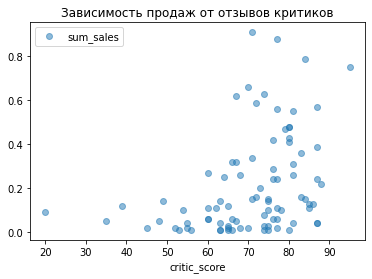

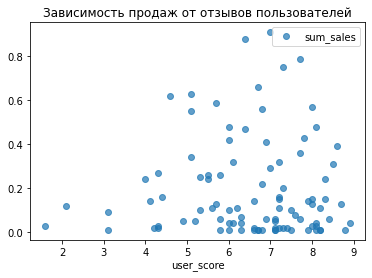

In [21]:
data.query('(platform == "XOne") & (sum_sales < 1)').plot(title="Зависимость продаж от отзывов критиков", x='critic_score', y='sum_sales', style='o', alpha=0.5)
data.query('(platform == "XOne") & (sum_sales < 1)').plot(title="Зависимость продаж от отзывов пользователей", x='user_score', y='sum_sales', style='o', alpha=0.7)
data.query('(platform == "XOne") & (sum_sales < 1)')[['critic_score', 'user_score', 'sum_sales']].corr()

**Вывод**

Согласно диаграммам расследования наблюдается некоторая прямая зависимость между продажами и отзывами критиков, что подтверждают данные по корреляции. Зависимость между продажами и отзывами пользователей отсутствует.

,critic_score,user_score,sum_sales
critic_score,1.000000,0.610340,0.333483
user_score,0.610340,1.000000,0.016041
sum_sales,0.333483,0.016041,1.000000


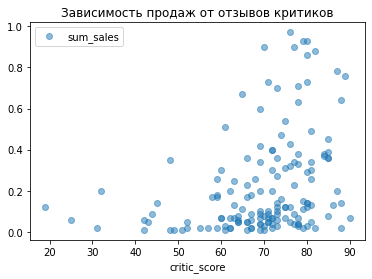

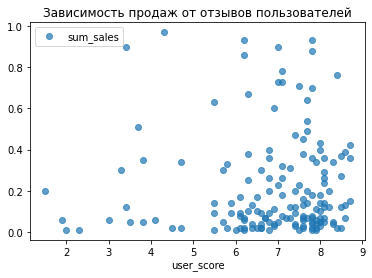

In [22]:
data.query('(platform == "PS4") & (sum_sales < 1)').plot(title="Зависимость продаж от отзывов критиков", x='critic_score', y='sum_sales', style='o', alpha=0.5)
data.query('(platform == "PS4") & (sum_sales < 1)').plot(title="Зависимость продаж от отзывов пользователей", x='user_score', y='sum_sales', style='o', alpha=0.7)
data.query('(platform == "PS4") & (sum_sales < 1)')[['critic_score', 'user_score', 'sum_sales']].corr()

**Вывод** 

Согласно диаграммам расследования наблюдается некоторая прямая зависимость между продажами и отзывами критиков, что подтверждают данные по корреляции. Зависимость между продажами и отзывами пользователей отсутствует.

,critic_score,user_score,sum_sales
critic_score,1.000000,0.533330,0.392849
user_score,0.533330,1.000000,-0.059738
sum_sales,0.392849,-0.059738,1.000000


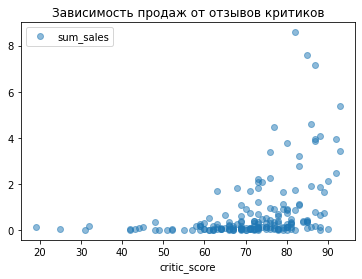

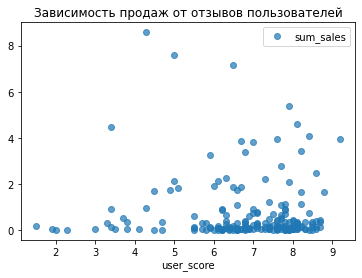

In [58]:
data.query('(platform == "PS4") & (sum_sales)').plot(title="Зависимость продаж от отзывов критиков", x='critic_score', y='sum_sales', style='o', alpha=0.5)
data.query('(platform == "PS4") & (sum_sales)').plot(title="Зависимость продаж от отзывов пользователей", x='user_score', y='sum_sales', style='o', alpha=0.7)
data.query('(platform == "PS4") & (sum_sales)')[['critic_score', 'user_score', 'sum_sales']].corr()

**Вывод** 

Согласно диаграммам расследования наблюдается некоторая прямая зависимость между продажами и отзывами критиков, что подтверждают данные по корреляции. Зависимость между продажами и отзывами пользователей отсутствует.

,critic_score,user_score,sum_sales
critic_score,1.000000,0.810476,0.320816
user_score,0.810476,1.000000,0.224655
sum_sales,0.320816,0.224655,1.000000


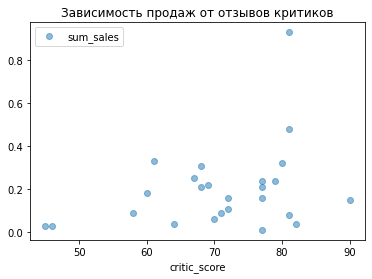

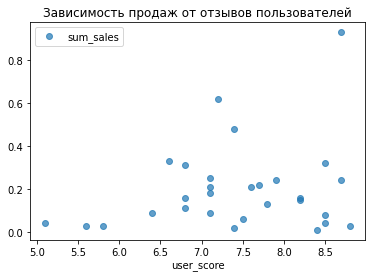

In [59]:
data.query('(platform == "3DS") & (sum_sales < 1)').plot(title="Зависимость продаж от отзывов критиков", x='critic_score', y='sum_sales', style='o', alpha=0.5)
data.query('(platform == "3DS") & (sum_sales < 1)').plot(title="Зависимость продаж от отзывов пользователей", x='user_score', y='sum_sales', style='o', alpha=0.7)
data.query('(platform == "3DS") & (sum_sales < 1)')[['critic_score', 'user_score', 'sum_sales']].corr()

**Вывод** 

Согласно диаграммам расследования наблюдается некоторая прямая зависимость между продажами и отзывами критиков, что подтверждают данные по корреляции. Зависимость между продажами и отзывами пользователей также есть, однако она слабее.

,critic_score,user_score,sum_sales
critic_score,1.000000,0.678858,0.317046
user_score,0.678858,1.000000,0.363519
sum_sales,0.317046,0.363519,1.000000


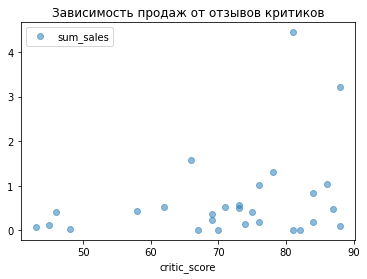

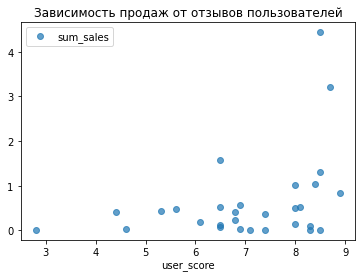

In [61]:
data.query('(platform == "WiiU") & (sum_sales)').plot(title="Зависимость продаж от отзывов критиков", x='critic_score', y='sum_sales', style='o', alpha=0.5)
data.query('(platform == "WiiU") & (sum_sales)').plot(title="Зависимость продаж от отзывов пользователей", x='user_score', y='sum_sales', style='o', alpha=0.7)
data.query('(platform == "WiiU") & (sum_sales)')[['critic_score', 'user_score', 'sum_sales']].corr()

**Вывод** 

Согласно диаграммам расследования отсутствует зависимость между продажами и отзывами критиков, что подтверждают данные по корреляции. Зависимость между продажами и отзывами пользователей также отсутствует.

,critic_score,user_score,sum_sales
critic_score,1.000000,0.576193,0.366566
user_score,0.576193,1.000000,0.006312
sum_sales,0.366566,0.006312,1.000000


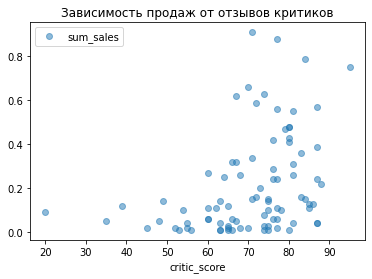

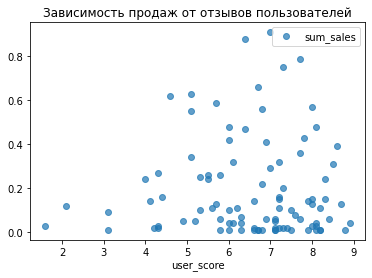

In [62]:
data.query('(platform == "XOne") & (sum_sales < 1)').plot(title="Зависимость продаж от отзывов критиков", x='critic_score', y='sum_sales', style='o', alpha=0.5)
data.query('(platform == "XOne") & (sum_sales < 1)').plot(title="Зависимость продаж от отзывов пользователей", x='user_score', y='sum_sales', style='o', alpha=0.7)
data.query('(platform == "XOne") & (sum_sales < 1)')[['critic_score', 'user_score', 'sum_sales']].corr()

**Вывод** 

Согласно диаграммам расследования наблюдается некоторая прямая зависимость между продажами и отзывами критиков, что подтверждают данные по корреляции. Зависимость между продажами и отзывами пользователей отсутвтвует.

In [27]:
data[['critic_score', 'user_score', 'sum_sales']].corr()

,critic_score,user_score,sum_sales
critic_score,1.000000,0.467901,0.325527
user_score,0.467901,1.000000,-0.001964
sum_sales,0.325527,-0.001964,1.000000


<AxesSubplot:xlabel='sum_sales', ylabel='genre'>

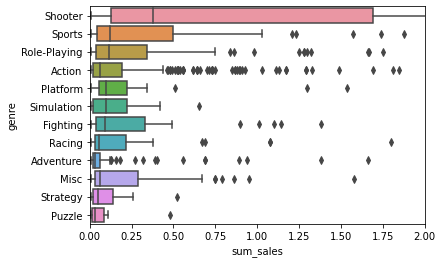

In [28]:
plt.xlim(0, 2)  
sns.boxplot(y="genre", x="sum_sales", data=platforms, orient="h")

In [29]:
display('Чаще продаются', data.groupby('genre')['sum_sales'].mean().sort_values(ascending=False).head())
display('Реже продаются',data.groupby('genre')['sum_sales'].mean().sort_values(ascending=False).tail())

'Чаще продаются'

genre
Shooter         1.305309
Sports          0.601215
Role-Playing    0.422879
Fighting        0.334324
Platform        0.331429
Name: sum_sales, dtype: float64

'Реже продаются'

genre
Simulation    0.228788
Misc          0.199577
Adventure     0.108909
Puzzle        0.102857
Strategy      0.102759
Name: sum_sales, dtype: float64

**Вывод**

Из построенного графика можно сделать вывод, в среднем больше всего продают игры с жанром Shooter и Sports, наименее популярн жанр Adventeure.

Из сгруппированных данных можно сделать вывод, что топ-5 самых популярных жанров (наибольшее количество продаж) это: Fifgting, Sports, Shooter, Role-Playing и Rlatform. Наименее популярны Misc, Simulation, Adventure, Strategy, Puzzle.

# Общий вывод по исследовательскому анализу данных

В ходе анализа были сделаны следующие выводы:

1) Данные следует анализировать, начиная с 1995 года;

2) Пик продаж компьютерных игр был в 2008 году;

3) В среднем на одной платформе играют в течение 10 лет, далее ей на замену приходят более новые и усовершенствованные;

4) На данный момент наиболее перспективной является платформа PS4. Также менее перспективными можно считать PS3, PSP, Wii, X360;

5) Зависимость между количеством продаж и отзывом критиков есть, корелляция является несущественной. В общем по играм она составляет около 0.24, однако есть платформы, где она больше. Практические у всех платформ отсутствует корреляция между отзывами пользователей и количеством продаж;

6) Также были выделены наиболее популярные жанры: Action, Sports, Shooter, Role-Playing и Misc. И наименее популярны Fighting, Simulation, Adventure, Strategy, Puzzle.

Итого, проведя анализ данных, следует отметить, что продажи игр на платформе PS4 являеются наиболее перспективными. Следует выпускать игру в жанре Action. Однако, на данный момент выпускать новую игру немного рискованно, так как большинство платформ на данный момент продают все меньше и меньше игр. 

# 3 Портрет пользователей каждого региона


**NA_SALES**

In [30]:
data_na = data.dropna(subset=['eu_sales', 'jp_sales']).copy()

In [31]:
display(data_na.groupby('platform')['na_sales'].mean().sort_values(ascending=False).head())
top_platforms_na = ['PS4', 'PSV', 'XOne', 'WiiU', 'Wii']

for elem in top_platforms_na:
    shares = int(100 * (data.query('platform == @elem')['na_sales'].sum() / data.query('platform == @elem')['sum_sales'].sum()).round(2))
    print('Платформа', elem, 'составляет', shares, '% в Северной Америке от общего числа продаж этой платформы по другим регионам.')

platform
XOne    0.301198
PS4     0.212159
WiiU    0.210952
X360    0.167708
Wii     0.098000
Name: na_sales, dtype: float64

Платформа PS4 составляет 34 % в Северной Америке от общего числа продаж этой платформы по другим регионам.
Платформа PSV составляет 5 % в Северной Америке от общего числа продаж этой платформы по другим регионам.
Платформа XOne составляет 57 % в Северной Америке от общего числа продаж этой платформы по другим регионам.
Платформа WiiU составляет 42 % в Северной Америке от общего числа продаж этой платформы по другим регионам.
Платформа Wii составляет 37 % в Северной Америке от общего числа продаж этой платформы по другим регионам.


In [32]:
display(data_na.groupby('genre')['na_sales'].mean().sort_values(ascending=False).head())

genre
Shooter         0.594815
Sports          0.245888
Role-Playing    0.150152
Fighting        0.149730
Platform        0.135000
Name: na_sales, dtype: float64

**Вывод**

Наиболее популярные жанры в Северной Америке Fighting, Role-Playing, Platform, Sports, Shooter.

In [33]:
display(data_na.groupby('rating')['na_sales'].sum().sort_values(ascending=False))

rating
M       47.03
0       37.44
E       26.59
T       22.86
E10+    17.87
Name: na_sales, dtype: float64

**Вывод**

По частоте продаж в Северной Америке игры имеют рейтинг M, O, E, T, E10+.

**EU_SALES**

In [34]:
data_eu = data.dropna(subset=['na_sales', 'jp_sales']).copy()

In [35]:
display(data_eu.groupby('platform')['eu_sales'].mean().sort_values(ascending=False).head())
top_platforms_eu = ['PS4', 'PSV', 'WiiU', '3DS', 'Wii']

for elem in top_platforms_eu:
    shares = int(100 * (data.query('platform == @elem')['eu_sales'].sum() / data.query('platform == @elem')['sum_sales'].sum()).round(2))
    print('Платформа', elem, 'составляет', shares, '% в Евросоюзе от общего числа продаж этой платформы по другим регионам.')

platform
PS4     0.277542
XOne    0.168263
WiiU    0.154524
Wii     0.146000
X360    0.087708
Name: eu_sales, dtype: float64

Платформа PS4 составляет 44 % в Евросоюзе от общего числа продаж этой платформы по другим регионам.
Платформа PSV составляет 10 % в Евросоюзе от общего числа продаж этой платформы по другим регионам.
Платформа WiiU составляет 31 % в Евросоюзе от общего числа продаж этой платформы по другим регионам.
Платформа 3DS составляет 17 % в Евросоюзе от общего числа продаж этой платформы по другим регионам.
Платформа Wii составляет 55 % в Евросоюзе от общего числа продаж этой платформы по другим регионам.


In [36]:
display(data_eu.groupby('genre')['eu_sales'].mean().sort_values(ascending=False).head())

genre
Shooter         0.497284
Sports          0.260000
Racing          0.155238
Role-Playing    0.130379
Platform        0.114286
Name: eu_sales, dtype: float64

**Вывод**

Наиболее популярные жанры в Евросоюзе Action, Role-Playing, Adventure, Sports, Shooter.

In [37]:
display(data_eu.groupby('rating')['eu_sales'].sum().sort_values(ascending=False))

rating
M       45.54
0       35.71
E       34.83
T       20.32
E10+    11.54
Name: eu_sales, dtype: float64

**Вывод**

По частоте продаж в Евросоюзе игры имеют рейтинг M, O, E, T, E10+.

**JP_SALES**

In [38]:
data_jp = data.dropna(subset=['eu_sales', 'jp_sales']).copy()

In [39]:
display(data_jp.groupby('platform')['jp_sales'].mean().sort_values(ascending=False).head())
top_platforms_jp = ['PS4', 'PSV', 'WiiU', '3DS', 'PS3']

for elem in top_platforms_jp:
    shares = int(100 * (data.query('platform == @elem')['jp_sales'].sum() / data.query('platform == @elem')['sum_sales'].sum()).round(2))
    print('Платформа', elem, 'составляет', shares, '% в Японии от общего числа продаж этой платформы по другим регионам.')

platform
3DS     0.178409
WiiU    0.098095
PS3     0.044775
PSV     0.043128
PS4     0.040033
Name: jp_sales, dtype: float64

Платформа PS4 составляет 6 % в Японии от общего числа продаж этой платформы по другим регионам.
Платформа PSV составляет 80 % в Японии от общего числа продаж этой платформы по другим регионам.
Платформа WiiU составляет 20 % в Японии от общего числа продаж этой платформы по другим регионам.
Платформа 3DS составляет 55 % в Японии от общего числа продаж этой платформы по другим регионам.
Платформа PS3 составляет 24 % в Японии от общего числа продаж этой платформы по другим регионам.


In [40]:
display(data_jp.groupby('genre')['jp_sales'].mean().sort_values(ascending=False).head())

genre
Role-Playing    0.101591
Puzzle          0.074286
Simulation      0.058485
Action          0.053480
Platform        0.050714
Name: jp_sales, dtype: float64

**Вывод**

Наиболее популярные жанры в Евросоюзе Action, Role-Playing, Platform, Puzzle, Simulation.

In [41]:
display(data_jp.groupby('rating')['jp_sales'].sum().sort_values(ascending=False))

rating
0       32.89
T        7.70
E        5.25
M        4.29
E10+     3.27
Name: jp_sales, dtype: float64

**Вывод**

По частоте продаж в Японии игры имеют рейтинг O, T, E, M, E10+

# Вывод по портрету каждого региона

**Платформы**
Составив портет каждого региона по количеству продаж, был сделан вывод о том, что наиболее популярными платформами в регионах являются WiiU и PS4. 

PS4: 6% в Японии, 44% в Евросоюзе и 34% в Северной Америке.

WiiU: 20% в Японии, 31% в Евросоюзе и 42% в Северной Америке.


По регионам наиболее популярные платформы: XOne в Северной Америке, 3DS в Японии, PS4 в Евросоюзе.

**Жанры**

По регионам наиболее популярные жанры: Shooter в Северной Америке, Role-Playing в Японии, Shooter в Евросоюзе.

**Рейтинг**

По регионам наиболее популярные рейтинги: M в Северной Америке, O в Японии, M в Евросоюзе. 

Также следует отметить, что в Евросоюзеи Северной Америке схожие предпочтения по компьютерным играм, так жанры, платформы и рейтинг практически полностью совпадают.

# 4 Статистический анализ данных

In [49]:
from scipy import stats as st
import numpy as np
import scipy.stats as stats

<AxesSubplot:>

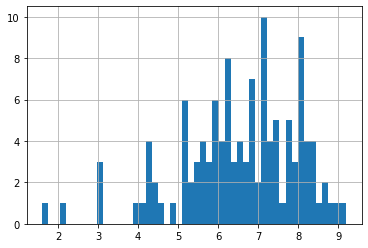

In [44]:
data.query('platform == "XOne"')['user_score'].hist(bins=50)

<AxesSubplot:>

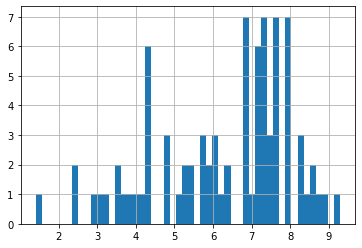

In [46]:
data.query('platform == "PC"')['user_score'].hist(bins=50)

**Нулевая гипотеза**

Рейтинги пользователей платформы XOne равен рейтингу пользователей платформы PC.

**Альтернативная гипотеза**

Рейтинги пользователей платформы XOne не равен рейтингу пользователей платформы PC.

Критерий статистической значимости выбран 0.05, исходя из наиболее часто применяемого такого значения, исходя из минимизации количества ошибок первого и второго рода.

**Статистический тест**

В качестве статистического криетрия был выбран критерий Манна-Уитни, так как выборки являются независимыми и их распределение не является нормальным.

In [47]:
# создаем необходимые наборы данных и удаляем из них пропуски
xone_score = data.copy()
pc_score = data.copy()

xone_score = xone_score.query('platform == "XOne"')['user_score'].dropna()
pc_score = pc_score.query('platform == "PC"')['user_score'].dropna()

In [51]:
alpha = 0.05 # уровень статистической значимости

_, p_value = stats.mannwhitneyu(xone_score, pc_score, alternative='two-sided')


print('p-значение:', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.5485557456791791
Не получилось отвергнуть нулевую гипотезу


**Вывод** 

Нулевая гипотеза не была отвергнута. Следовательно, пользовательские рейтинги данных платформ равны.

<AxesSubplot:>

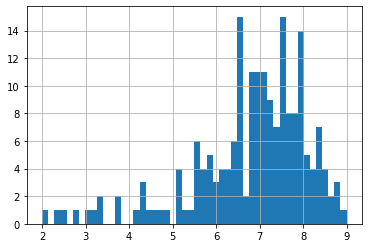

In [52]:
data.query('genre == "Action"')['user_score'].hist(bins=50)

<AxesSubplot:>

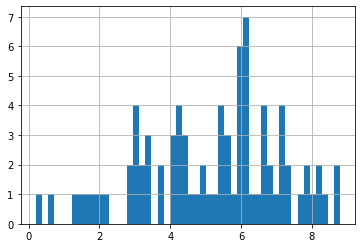

In [53]:
data.query('genre == "Sports"')['user_score'].hist(bins=50)

**Нулевая гипотеза**

Рейтинг пользователей жанра Action не равен рейтингу пользователей жанра Sports.

**Альтернативная гипотеза**

Рейтинг пользователей жанра Action равен рейтингу пользователей жанра Sports.

Критерий статистической значимости выбран 0.05, исходя из наиболее часто применяемого такого значения, исходя из минимизации количества ошибок первого и второго рода.

**Статистический тест**

В качестве статистического криетрия был выбран критерий Манна-Уитни, так как выборки являются независимыми и их распределение не является нормальным.

In [54]:
# создаем необходимые наборы данных и удаляем из них пропуски
action_score = data.copy()
sports_score = data.copy()

action_score = action_score.query('genre == "Action"')['user_score'].dropna()
sports_score = sports_score.query('genre == "Sports"')['user_score'].dropna()

In [55]:
alpha = 0.05 # уровень статистической значимости

_, p_value = stats.mannwhitneyu(action_score, sports_score, alternative='two-sided')


print('p-значение:', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.3982324399866677e-11
Отвергаем нулевую гипотезу


**Вывод** 

Нулевая гипотеза была отвергнута. Следовательно, пользовательские рейтинги даных жанров равны.

# Общий вывод

Итого, проведя анализ данных, следует отметить, что продажи игр на платформе PS4 являеются наиболее перспективными, она же является наиболее популярной среди регионов. 

Платформы

По регионам наиболее популярные платформы: XOne в Северной Америке, 3DS в Японии, PS4 в Евросоюзе.

Жанры

По регионам наиболее популярные жанры: Shooter в Северной Америке, Role-Playing в Японии, Shooter в Евросоюзе.

Рейтинг

По регионам наиболее популярные рейтинги: M в Северной Америке, O в Японии, M в Евросоюзе.

Также следует отметить, что в Евросоюзеи Северной Америке схожие предпочтения по компьютерным играм, так жанры, платформы и рейтинг практически полностью совпадают.

Наиболее популярным является рейтинг М.


**Общая рекомендация** 


Итого, делая общий вывод следует отметить, что продажа компьютерных игр на платформах является рисокванным бизнесом. И при выпуске новой игры в Европе (так как Россия частично нахоится на территории Европы) следует дать следующие рекомендации: игры должна быть на платформе PS4, с рейтингом M, более предпочтительный жанр: Shooter.